In [1]:
(* Reference State *)
g₍₀₎₁₁[u¹_, u²_] = 1 - 2 κ₍₀₎[u¹] u² + (κ₍₀₎[u¹]^2 - Κ₍₀₎[u¹]) u²^2;
g₍₀₎₁₂[u¹_, u²_] = 0;
g₍₀₎₂₁[u¹_, u²_] = 0;
g₍₀₎₂₂[u¹_, u²_] = 1;

g₍₀₎⁽⁰⁾₁₁[u¹_, u²_] = 1;
g₍₀₎⁽⁰⁾₁₂[u¹_, u²_] = 0;
g₍₀₎⁽⁰⁾₂₁[u¹_, u²_] = 0;
g₍₀₎⁽⁰⁾₂₂[u¹_, u²_] = 1;

In [10]:
(* Current State *)
𝒑₍ₜ₎[u¹_, u²_, β_] = 𝒄[u¹, β] + ξ[u¹, u², β]𝒆₁₍ₜ₎[u¹, β] + η[u¹, u², β]𝒆₂₍ₜ₎[u¹, β];
Derivative[1,0][𝒆₁₍ₜ₎][t_, β_] = κ₍₀₎[t]𝒆₂₍ₜ₎[t, β];
Derivative[1,0][𝒆₂₍ₜ₎][t_, β_] = -κ₍₀₎[t]𝒆₁₍ₜ₎[t, β];
Derivative[1,0][𝒄][t_, β_] = ṡ₍ₜ₎[t, β]𝒆₁₍ₜ₎[t, β];
ξ[u¹_, 0, β_] = 0;
η[u¹_, 0, β_] = 0;

𝒑₍ₜ₎₁[u¹_, u²_, β_] = D[𝒑₍ₜ₎[u¹, u², β], u¹];
𝒑₍ₜ₎₂[u¹_, u²_, β_] = D[𝒑₍ₜ₎[u¹, u², β], u²];

tmp1[u¹_, u²_, β_] = 𝒑₍ₜ₎₁[u¹, u², β]/.{𝒆₁₍ₜ₎[u¹, β] -> {1,0}, 𝒆₂₍ₜ₎[u¹, β] -> {0,1}};
tmp2[u¹_, u²_, β_] = 𝒑₍ₜ₎₂[u¹, u², β]/.{𝒆₁₍ₜ₎[u¹, β] -> {1,0}, 𝒆₂₍ₜ₎[u¹, β] -> {0,1}};

g₍ₜ₎₁₁[u¹_, u²_, β_] = tmp1[u¹, u², β].tmp1[u¹, u², β];
g₍ₜ₎₁₂[u¹_, u²_, β_] = tmp1[u¹, u², β].tmp2[u¹, u², β];
g₍ₜ₎₂₁[u¹_, u²_, β_] = tmp2[u¹, u², β].tmp1[u¹, u², β];
g₍ₜ₎₂₂[u¹_, u²_, β_] = tmp2[u¹, u², β].tmp2[u¹, u², β];

g₍ₜ₎⁽⁰⁾₁₁[u¹_, u²_, β_] = g₍ₜ₎₁₁[u¹, u², β] / g₍₀₎₁₁[u¹, u²];
g₍ₜ₎⁽⁰⁾₁₂[u¹_, u²_, β_] = g₍ₜ₎₁₂[u¹, u², β] / Sqrt[g₍₀₎₁₁[u¹, u²]];
g₍ₜ₎⁽⁰⁾₂₁[u¹_, u²_, β_] = g₍ₜ₎₂₁[u¹, u², β] / Sqrt[g₍₀₎₁₁[u¹, u²]];
g₍ₜ₎⁽⁰⁾₂₂[u¹_, u²_, β_] = g₍ₜ₎₂₂[u¹, u², β];

In [29]:
(* Strain *)
E⁽⁰⁾₁₁[u¹_, u²_, β_] = g₍ₜ₎⁽⁰⁾₁₁[u¹, u², β] - g₍₀₎⁽⁰⁾₁₁[u¹, u²];
E⁽⁰⁾₁₂[u¹_, u²_, β_] = g₍ₜ₎⁽⁰⁾₁₂[u¹, u², β] - g₍₀₎⁽⁰⁾₁₂[u¹, u²];
E⁽⁰⁾₂₁[u¹_, u²_, β_] = g₍ₜ₎⁽⁰⁾₂₁[u¹, u², β] - g₍₀₎⁽⁰⁾₂₁[u¹, u²];
E⁽⁰⁾₂₂[u¹_, u²_, β_] = g₍ₜ₎⁽⁰⁾₂₂[u¹, u², β] - g₍₀₎⁽⁰⁾₂₂[u¹, u²];

In [63]:
(* Lame Constant *)
d = 2;
λ = ν*Y/((1+ν)(1-(d-1)ν));
μ = Y/(2(1+ν));

In [71]:
E⁽⁰⁾[u¹_, u²_, β_] = {{E⁽⁰⁾₁₁[u¹, u², β],E⁽⁰⁾₁₂[u¹, u², β]},{E⁽⁰⁾₂₁[u¹, u², β],E⁽⁰⁾₂₂[u¹, u², β]}};

In [75]:
δ = KroneckerDelta;

In [78]:
C⁽⁰⁾ = Table[λ δ[i,j] δ[k,l] + μ(δ[i,k] δ[j,l] + δ[i,l] δ[j,k]), {i,1,d}, {j,1,d}, {k,1,d}, {l,1,d}];

In [99]:
(* TODO *)
𝒲[u¹_, u²_, β_] = Sum[C⁽⁰⁾[[i,j,k,l]]*E⁽⁰⁾[u¹, u², β][[i,j]]*E⁽⁰⁾[u¹, u², β][[k,l]], {i,1,d}, {j,1,d}, {k,1,d}, {l,1,d}]/2;

In [103]:
𝒲[s_, r_] = 𝒲[s, β B[s] r, β];

Y           Y ν
Integrate[((----- + ---------------) 
            1 + ν   (1 - ν) (1 + ν)
 
               (0,1,0)                2    (0,1,0)                2 2
>       (-1 + η       [s, r β B[s], β]  + ξ       [s, r β B[s], β] )  + 
 
                   (0,1,0)
>      (2 Y Power[η       [s, r β B[s], β] 
 
                                           (1,0,0)
>            (κ₍₀₎[s] ξ[s, r β B[s], β] + η       [s, r β B[s], β]) + 
 
             (0,1,0)
>           ξ       [s, r β B[s], β] 
 
                                                         (1,0,0)
>            (ṡ₍ₜ₎[s, β] - η[s, r β B[s], β] κ₍₀₎[s] + ξ       [s, r β B[s], β]), 2]) / 
 
                                            2  2     2         2
>       ((1 + ν) (1 - 2 r β B[s] κ₍₀₎[s] + r  β  B[s]  (κ₍₀₎[s]  - Κ₍₀₎[s]))) + 
 
                     (0,1,0)                2    (0,1,0)                2
>      (2 Y ν (-1 + η       [s, r β B[s], β]  + ξ       [s, r β B[s], β] ) 
 
                                               (1,0,0)                 2
>         (-1 + ((κ₍₀₎[s] ξ[s, r β B[s], β] + η       [s, r β B[s], β])  + 
 
                                                           (1,0,0)                 2
>              (ṡ₍ₜ₎[s, β] - η[s, r β B[s], β] κ₍₀₎[s] + ξ       [s, r β B[s], β]) ) / 
 
                                        2  2     2         2
>            (1 - 2 r β B[s] κ₍₀₎[s] + r  β  B[s]  (κ₍₀₎[s]  - Κ₍₀₎[s])))) / 
 
                               Y           Y ν
>       ((1 - ν) (1 + ν)) + (----- + ---------------) 
                             1 + ν   (1 - ν) (1 + ν)
 
                                                  (1,0,0)                 2
>       Power[-1 + ((κ₍₀₎[s] ξ[s, r β B[s], β] + η       [s, r β B[s], β])  + 
 
                                                         (1,0,0)                 2
>            (ṡ₍ₜ₎[s, β] - η[s, r β B[s], β] κ₍₀₎[s] + ξ       [s, r β B[s], β]) ) / 
 
                                      2  2     2         2
>          (1 - 2 r β B[s] κ₍₀₎[s] + r  β  B[s]  (κ₍₀₎[s]  - Κ₍₀₎[s])), 2]) / 2, 
 
>   {s, -1, 1}]
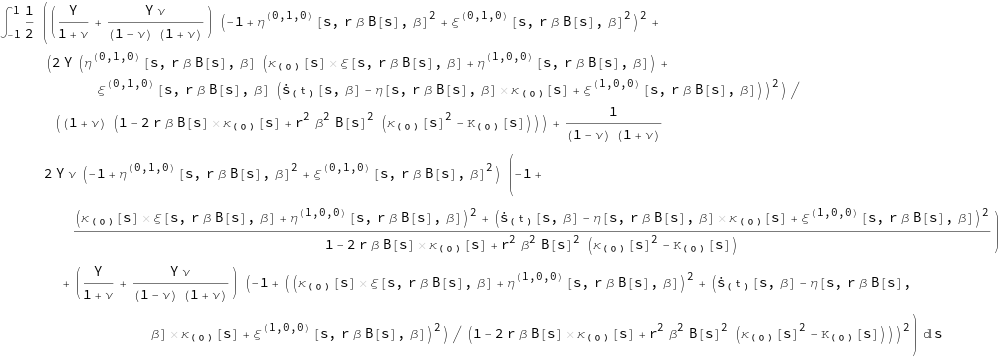

In [105]:
𝒲[s, r]

In [ ]:
W = Integrate[]

In [ ]:
g₍ₜ₎⁽⁰⁾₁₁[u¹_, u²_]


In [19]:
₍₎₀₁₂₃⁽⁾⁰¹²³ₜβκΚξη

₍₎₀₁₂₃⁽⁾⁰¹²³ₜ

In [ ]:
g₍₀₎₁₁[u¹_, u²_] = 1 - 2 κ₍₀₎[u¹] u² + (κ₍₀₎[u¹]^2 - K₍₀₎[u¹]) u²^2;(* + O[u²]^3 *)
g₍₀₎₁₂[u¹_, u²_] = 0;
g₍₀₎₂₁[u¹_, u²_] = 0;
g₍₀₎₂₂[u¹_, u²_] = 1;

g₍₀₎⁽⁰⁾₁₁[u¹_, u²_] = 1;
g₍₀₎⁽⁰⁾₁₂[u¹_, u²_] = 0;
g₍₀₎⁽⁰⁾₂₁[u¹_, u²_] = 0;
g₍₀₎⁽⁰⁾₂₂[u¹_, u²_] = 1;


\!\(\*SuperscriptBox[\(c₍ₜ₎\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[\[Beta]_, s_] = 
  ṡ₍ₜ₎[\[Beta], s] e₁[\[Beta], s];

\!\(\*SuperscriptBox[\(e₁\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[\[Beta]_, s_] = 
  ṡ₍ₜ₎[\[Beta], s ] κ₍ₜ₎[\[Beta], s] e₂[\[Beta], s];

\!\(\*SuperscriptBox[\(e₂\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[\[Beta]_, 
   s_] = -ṡ₍ₜ₎[\[Beta], s ] κ₍ₜ₎[\[Beta], s] e₁[\[Beta], s];

\[Xi][\[Beta]_, u¹_, 0] = 0;

\!\(\*SuperscriptBox[\(\[Xi]\), 
TagBox[
RowBox[{"(", 
RowBox[{"i_", ",", "j_", ",", "0"}], ")"}],
Derivative],
MultilineFunction->None]\)[\[Beta]_, u¹_, 0] = 0;
\[Eta][\[Beta]_, u¹_, 0] = 0;

\!\(\*SuperscriptBox[\(\[Eta]\), 
TagBox[
RowBox[{"(", 
RowBox[{"i_", ",", "j_", ",", "0"}], ")"}],
Derivative],
MultilineFunction->None]\)[\[Beta]_, u¹_, 0] = 0;

p₍ₜ₎[\[Beta]_, u¹_, u²_] = 
  c₍ₜ₎[\[Beta], 
    u¹] + \[Xi][\[Beta], u¹, u²] e₁[\[Beta], u¹] + \[Eta][\[Beta], 
     u¹, u²] e₂[\[Beta], u¹];

p₍ₜ₎₁[\[Beta]_, u¹_, u²_] = 
  D[p₍ₜ₎[\[Beta], u¹, u²], u¹] /. {e₁[\[Beta], u¹] -> {1, 0}, 
    e₂[\[Beta], u¹] -> {0, 1}};
p₍ₜ₎₂[\[Beta]_, u¹_, u²_] = 
  D[p₍ₜ₎[\[Beta], u¹, u²], u²] /. {e₁[\[Beta], u¹] -> {1, 0}, 
    e₂[\[Beta], u¹] -> {0, 1}};

g₍ₜ₎₁₁[\[Beta]_, u¹_, u²_] = 
  p₍ₜ₎₁[\[Beta], u¹, u²].p₍ₜ₎₁[\[Beta], u¹, u²];
g₍ₜ₎₁₂[\[Beta]_, u¹_, u²_] = 
  p₍ₜ₎₁[\[Beta], u¹, u²].p₍ₜ₎₂[\[Beta], u¹, u²];
g₍ₜ₎₂₁[\[Beta]_, u¹_, u²_] = 
  p₍ₜ₎₂[\[Beta], u¹, u²].p₍ₜ₎₁[\[Beta], u¹, u²];
g₍ₜ₎₂₂[\[Beta]_, u¹_, u²_] = 
  p₍ₜ₎₂[\[Beta], u¹, u²].p₍ₜ₎₂[\[Beta], u¹, u²];

g₍ₜ₎⁽⁰⁾₁₁[\[Beta]_, u¹_, u²_] = 
  g₍ₜ₎₁₁[\[Beta], u¹, u²]/g₍₀₎₁₁[u¹, u²];
g₍ₜ₎⁽⁰⁾₁₂[\[Beta]_, u¹_, u²_] = 
  g₍ₜ₎₁₂[\[Beta], u¹, u²]/Sqrt[g₍₀₎₁₁[u¹, u²]];
g₍ₜ₎⁽⁰⁾₂₁[\[Beta]_, u¹_, u²_] = 
  g₍ₜ₎₂₁[\[Beta], u¹, u²]/Sqrt[g₍₀₎₁₁[u¹, u²]];
g₍ₜ₎⁽⁰⁾₂₂[\[Beta]_, u¹_, u²_] = g₍ₜ₎₂₂[\[Beta], u¹, u²];

E⁽⁰⁾₁₁[\[Beta]_, u¹_, u²_] = 
  1/2 (g₍ₜ₎⁽⁰⁾₁₁[\[Beta], u¹, u²] - g₍₀₎⁽⁰⁾₁₁[u¹, u²]);
E⁽⁰⁾₁₂[\[Beta]_, u¹_, u²_] = 
  1/2 (g₍ₜ₎⁽⁰⁾₁₂[\[Beta], u¹, u²] - g₍₀₎⁽⁰⁾₁₂[u¹, u²]);
E⁽⁰⁾₂₁[\[Beta]_, u¹_, u²_] = 
  1/2 (g₍ₜ₎⁽⁰⁾₂₁[\[Beta], u¹, u²] - g₍₀₎⁽⁰⁾₂₁[u¹, u²]);
E⁽⁰⁾₂₂[\[Beta]_, u¹_, u²_] = 
  1/2 (g₍ₜ₎⁽⁰⁾₂₂[\[Beta], u¹, u²] - g₍₀₎⁽⁰⁾₂₂[u¹, u²]);

E⁽⁰⁾[\[Beta]_, u¹_, 
   u²_] = {{E⁽⁰⁾₁₁[\[Beta], u¹, u²], 
    E⁽⁰⁾₁₂[\[Beta], u¹, u²]}, {E⁽⁰⁾₂₁[\[Beta], u¹, u²], 
    E⁽⁰⁾₂₂[\[Beta], u¹, u²]}};

In [ ]:
(*1*)
E⁽⁰⁾[\[Beta], u¹, \[Beta] B[u¹] r] + O[\[Beta]]^1 // Simplify

In [ ]:
ṡ₍ₜ₎[0, u¹] = 1;

\!\(\*SuperscriptBox[\(\[Xi]\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "0", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 0] = 0;

\!\(\*SuperscriptBox[\(\[Eta]\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "0", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 0] = 1;
E⁽⁰⁾[\[Beta], u¹, \[Beta] B[u¹] r] + O[\[Beta]]^1 // Simplify

In [ ]:
(*2*)
E⁽⁰⁾[\[Beta], u¹, \[Beta] B[u¹] r] + O[\[Beta]]^2 // Simplify

In [ ]:

\!\(\*SuperscriptBox[\(ṡ₍ₜ₎\), 
TagBox[
RowBox[{"(", 
RowBox[{"1", ",", "0"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹] = 0;

\!\(\*SuperscriptBox[\(\[Xi]\), 
TagBox[
RowBox[{"(", 
RowBox[{"1", ",", "0", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 0] = 0;

\!\(\*SuperscriptBox[\(\[Eta]\), 
TagBox[
RowBox[{"(", 
RowBox[{"1", ",", "0", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 0] = 0;

\!\(\*SuperscriptBox[\(\[Eta]\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "0", ",", "2"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 0] = 0;

\!\(\*SuperscriptBox[\(\[Eta]\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "1", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 0] = -
\!\(\*SuperscriptBox[\(\[Xi]\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "0", ",", "2"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 0];

\!\(\*SuperscriptBox[\(\[Xi]\), 
TagBox[
RowBox[{"(", 
RowBox[{"0", ",", "1", ",", "1"}], ")"}],
Derivative],
MultilineFunction->None]\)[0, u¹, 
   0] = -\[Kappa]₍₀₎[u¹] + \[Kappa]₍ₜ₎[0, u¹];
E⁽⁰⁾[\[Beta], u¹, \[Beta] B[u¹] r] + O[\[Beta]]^2 // Simplify